In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lab 4 -- physics of supernova light curves
In this lab we will use a simple analytic model to understand the optical light curves of supernova and other explosive, stellar transients.

As discussed in the pre-lab video, in a simple model the luminosity as a function of time L(t) of an expanding supernova (with $R(t) = vt$ for constant expansion velocity $v$) can be written,

$$\left(\frac{d}{dt}+\frac{t}{t_d^2} \right) L(t) = Q(t)$$

where $Q(t)$ is the heating from any internal source of energy generation (for example, an initial explosion energy or radioactive decay) and

$$t_d = \left(\frac{3}{4π} \frac{\kappa M}{vc} \right)^{1/2}$$

is the diffusion time. Here $\kappa$ is the opacity and M is the total mass of ejected material, both assumed independent of time t.

### 1. Light curves for an initial explosion energy $E_0$
This differential equation can be integrated for any energy injection function Q(t) describing how a supernova is powered:

$$L(t) = \frac{e^{-t^2/2t_d^2}}{t_d^2} \int_0^t dt' t' e^{\frac{t'^2}{2t_d^2}} Q(t')$$

where we have used an initial condition of $L(0)=0$. Calculate the light curve of a supernova powered by an initial explosion energy $E_0$ which is deposited immediately in the ejecta at some initial time $t_0$, $Q(t)=E_0  \delta(t-t_0)$, where $\delta$ is the Dirac delta function.

$$ L = \frac{E_0t_0}{t_d^2} e^{\frac{-t^2+t_0^2}{2t_d^2}} $$


### 2. Plot the resulting light curve

Using an explosion energy $E_0 = 10^{51}$ erg deposited at $t_0 = R/v$ with $R = 10^{14}$ cm, opacity $\kappa = 0.4$ cm$^{2}$ g$^{-1}$, ejecta mass of $10 M_{\rm Sun}$, and velocity $v = 10^4$ km s$^{-1}$, make a plot of your light curve filling in the template code below.

Text(0, 0.5, 'luminosity $L(t)$ (erg s$^{-1}$)')

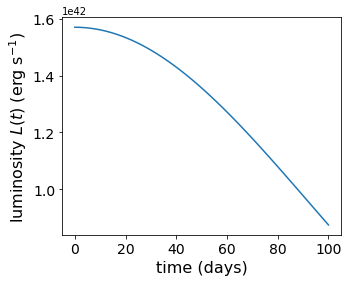

In [2]:
# calculate td in days
v=1e9; kappa=0.4; Mej=10*2e33; c=3e10
td=np.sqrt(3./4./np.pi*kappa*Mej/v/c)/86400.
E0=1e51; t0=1e14/1e9/86400.

# array of time values in units of days
time=np.arange(50)/49.*100.

# enter in your luminosity equation in terms of td below, using the time values. 
# You will want to take care that your units are in erg s^-1 and not erg d^-1!
#L=your function of time, td
L=E0*t0/td**2./86400.*np.exp(-(time**2.-t0**2.)/2./td**2.)

plt.figure(figsize=(5,4))
plt.plot(time,L)
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel('time (days)',fontsize=16); plt.ylabel(r'luminosity $L(t)$ (erg s$^{-1}$)',fontsize=16)

### 3. Arnett's Law

"Arnett's Law" provides a useful approximation for the peak luminosity $L_p$ of a supernova in terms of its observed time to peak, $t_p$, which is usually of order the diffusion time $t_d$:

$$L_p = L(t_p) \approx \frac{U_{\rm rad} (t_p)}{t_p}$$

Compare the result from this approximation to your maximum value of $L_p$ calculated above, using that for adiabatic expansion 

$$U_{\rm rad}(t) = \frac{E_0 R_0}{vt}$$

Using this estimate, what is the peak luminosity at t_p= 30 days for a Type Ia supernova (exploding white dwarf, $R_0 \approx 10^9$  cm, $M_{\rm ej} \approx 1 M_{\rm Sun}$) and a Type IIP supernova (exploding red supergiant, $R_0 \approx 10^{14}$  cm, $M_{\rm ej} \approx 10 M_{\rm Sun}$). 

Explain physically why the luminosity is so different in the two cases. Where does the explosion energy go when the luminosity is so low?

In [3]:
#L(t_p = t_d) = urad/td = E0R0/vttd
R0=1e14 #cm
Lp = E0*R0/v/(td*86400)**2
print(Lp) #pretty much the same as plot above


R0wd=1e9; Mewd=2e33; R0IIP=1e14; MeIIP=10*2e33
t0wd=R0wd/1e9/86400.; t0IIP=R0IIP/1e9/86400.
tdwd=np.sqrt(3./4./np.pi*kappa*Mewd/v/c)/86400.;tdIIP=np.sqrt(3./4./np.pi*kappa*MeIIP/v/c)/86400.
Lwd=E0*t0wd/tdwd**2./86400.*np.exp(-(30**2.-t0wd**2.)/2./tdwd**2.);LIIP=E0*t0IIP/tdIIP**2./86400.*np.exp(-(30**2.-t0IIP**2.)/2./tdIIP**2.)
print("wd (long way) = {0}".format(Lwd))
print("IIP (long way) = {0}".format(LIIP))
wdArnett=E0*R0wd/v/(30*86400)**2; IIPArnett=E0*R0IIP/v/(30*86400)**2
print("wd (Arnett @30 days) = {0}".format(wdArnett))
print("IIP (Arnett @30 days) = {0}".format(IIPArnett))

1.570796326794897e+42
wd (long way) = 9.267381502755184e+37
IIP (long way) = 1.490176474552959e+42
wd (Arnett @30 days) = 1.4884354519128182e+38
IIP (Arnett @30 days) = 1.4884354519128183e+43


Notice that these are all in rough agreement with each other. The crazy thing is that the white dwarf supernova ends up being 100,000 times less luminous assuming this -- and that's now what we observe physically! They should have luminosities ~ the same order of magnitude, so this tells us something else must be powering the WD to get it to reach that luminosity -- most of initial explosion energy ($E_0$) is sapped away by the excess work (think PdV from ideal gas law) to overcome the larger radial expansion required (another way to think about this is to consider the difference in gravitational potentials). 

### 4. Thermonuclear supernovae

4. One alternative energy source for supernovae is radioactive decay of $^{56}$Ni, which can form in large quantities as a result of fusion reactions in a degenerate C/O white dwarf. The energy injection is then given by the half-life of radioactive decay,

$$U_{\rm rad}(t)= \epsilon M_{\rm Ni} c^2  e^{-t/t_{\rm Ni}}$$

where $M_{\rm Ni}$ is the $^{56}$Ni mass and $t_{\rm Ni} \approx 6$ days is the half-life of $^{56}$Ni. What is the peak luminosity at 30 days if the entire $1 M_{\rm Sun}$ white dwarf is made of $^{56}$Ni? Is this a plausible mechanism for powering a Type Ia supernova?

In [8]:
def UrNi(t,Mn,eps=3e-5):
    return eps*Mn*9e20*np.exp(-t/6)

LNi=UrNi(15,2e33)/(15*86400)
LNi #this is pretty close to the right magnitude, so it seems plausible!

#note that I changed this to 15 days because I looked at the plot below and that seemed more sensible.

3.420208275995784e+42

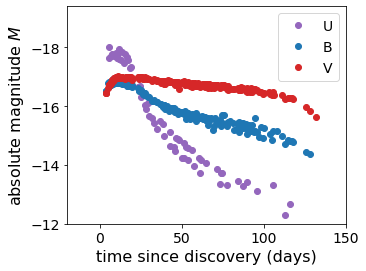

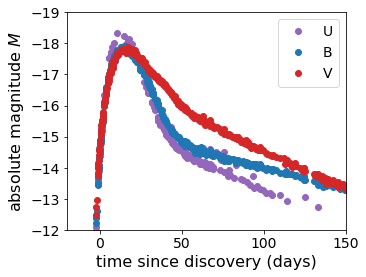

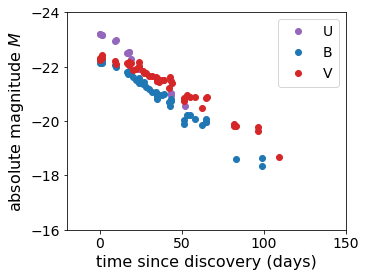

In [5]:
d1 = pd.read_csv('sn2012aw.csv')
d2 = pd.read_csv('sn2011fe_lc.csv')
d3 = pd.read_csv('sn2008es_lc.csv')

colors=['C4','C0','C3']; labels=['U','B','V']

for d,dmod,ymax,ymin,t0 in zip([d1,d2,d3],[30.3,27.8,40.],[-19.4,-19.,-24],[-12.,-12.,-16.],[56000,55800,54600]):
    plt.figure(figsize=(5,4))
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    plt.xlabel('time since discovery (days)',fontsize=16); plt.ylabel(r'absolute magnitude $M$',fontsize=16)
    for l,c in zip(labels,colors):
        select=(d['band']==l) & (d['upperlimit']=='F')
        plt.plot(d['time'][select]-t0,d['magnitude'][select]-dmod,marker='o',linestyle='',color=c,label=l)
        plt.ylim(ymin,ymax); plt.xlim(-20,150)
        plt.legend(fontsize=14)

### 5. Observed optical light curves

The figure shows light curves (bolometric luminosity vs time) for 3 supernovae in the optical UBVR bands. Measure by eye the approximate duration of the events and peak luminosities in each case (converting from absolute magnitude to luminosity, ie $M = -2.5 \mathrm{log_{10}}(L / L_0)$ with $L_0 = 3 \times 10^{35} erg/s$ -- and it may be useful to note that the Sun has an absolute magnitude of $M \simeq 4.8$ in these bands).

Use the below template below to make a plot of peak luminosity vs. (approximate) duration for these 3 objects.


Easiest way to do this is to note that 

$$M_{SN} - M_{sun} = -2.5\mathrm{log_{10}}(\frac{L_{SN}}{L_{Sun}}) $$

so that 

$$ L_{SN} = L_{Sun}\times 10^{\frac{M_{Sun} - M_{SN}}{2.5}} $$

In [6]:
#L = L_0 * 10^{-2.5*M} way
L0=3e35
L1=L0*10**(-2*-17/5); t1=30
L2=L0*10**(-2*-18/5); t2=50
L3=L0*10**(-2*-22.5/5); t3=100
# or better
Lsun=3.8e33 
L1=Lsun*10**((4.8+17)/2.5)
L2=Lsun*10**((4.8+18)/2.5)
L3=Lsun*10**((4.8+22.5)/2.5)
print(L1,L2,L3)

1.994268348949139e+42 5.009375606514358e+42 3.1607023301901493e+44


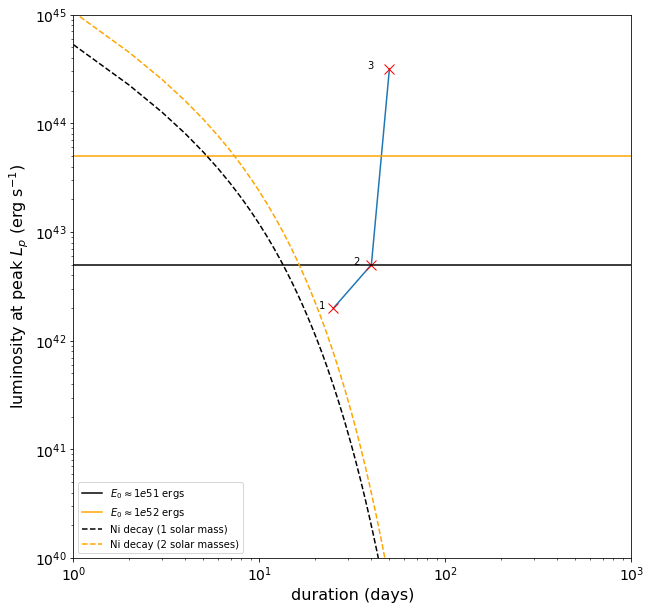

In [13]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel('duration (days)',fontsize=16); plt.ylabel(r'luminosity at peak $L_p$ (erg s$^{-1}$)',fontsize=16)

# enter in your durations and peak luminosities below!
tp = [25,40,50]; Lp = [L1,L2,L3] #estimated t roughly where mag dropped by 2
plt.loglog(tp,Lp,marker="x",markersize=10,markeredgecolor="red")
for i in range(len(tp)):
    plt.annotate("{0}".format(i+1),(tp[i]-4*(i+1),Lp[i]))
#for E0 ~ 10^51 L was ~ 5e42 (averaging Arnett's and "long" way), if we make E0*10 we get L*10
#for 1 solar mass of Ni @ 15 days we had L_p ~ 1.7e42, for 2 solar masses we get ~3.4e42
plt.axhline(5e42,label="$E_0 \\approx 1e51$ ergs",color="black")
plt.axhline(5e43,label="$E_0 \\approx 1e52$ ergs",color="orange")
t=np.linspace(1,1000,1000)
Ni1=UrNi(t,2e33)/(t*86400)
Ni2=UrNi(t,4e33)/(t*86400)
plt.plot(t,Ni1,label="Ni decay (1 solar mass)",ls="--",color="black")
plt.plot(t,Ni2,label="Ni decay (2 solar masses)",ls="--",color="orange")
plt.ylim(1e40,1e45)
plt.xlim(1,1e3)
plt.legend(loc="lower left")

### 6. Which ones could be powered by an initial explosion energy $E_0 \approx 10^{51}$ erg or radioactive decay of $^{56}$Ni at their peak, and why? 

From the plot above it seems like objects 1 and 2 could plausible be explained by either Ni decay or an initial energy near $E_0 \approx 10^{51}$ ergs. The spectrum of object 2 is a classic example of Type 1a spectrum (it has the nice kink where it stops being powered by Ni) so that one's probably powered by Ni decay and the other looks like a classic type II supernova. The third object, however, is much too luminous to be described by either! We will talk more about this in class Tuesday...(or read like the rest of the Q suggested). 

Try searching the internet for "superluminous supernova" -- by clicking one journal article link and looking at the Introduction, what is one energy source that has been proposed to power supernovae that are unlikely to result from an initial explosion energy or radioactive decay?

